📁 Please upload your advanced stats file (with PER, TS%, OWS, OBPM, VORP)


Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025.csv


/tmp/ipython-input-1-962424303.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


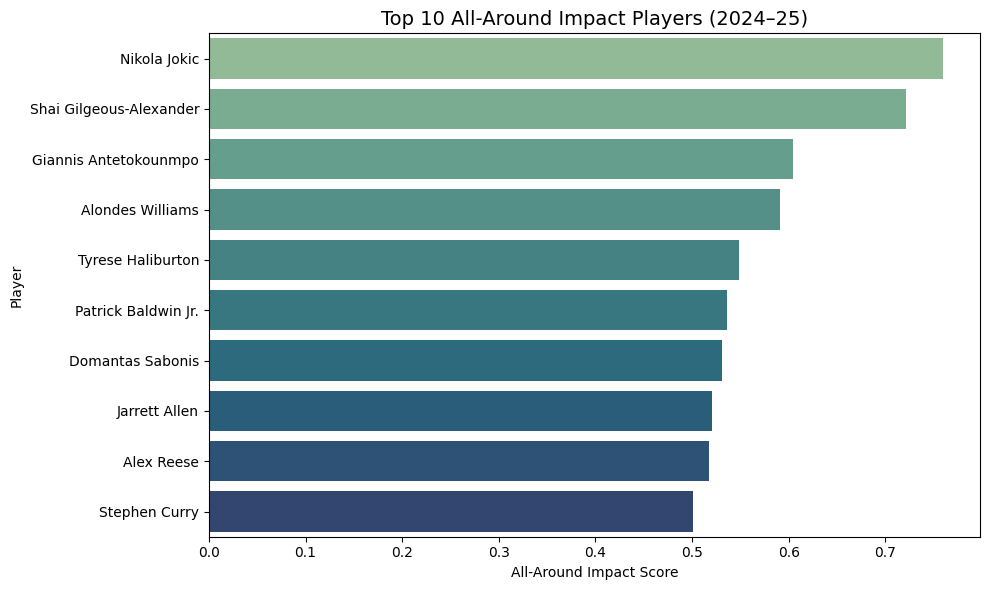

In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📁 Step 2: Upload CSV File
print("📁 Please upload your advanced stats file (with PER, TS%, OWS, OBPM, VORP)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📊 Step 3: Load Dataset
df = pd.read_csv(filename)

# ✅ Step 4: Check if all needed columns are present
required_cols = ['Player', 'PER', 'TS%', 'OWS', 'OBPM', 'VORP']
if not all(col in df.columns for col in required_cols):
    raise ValueError("Missing one or more required columns.")

# 🔢 Step 5: Convert to numeric and drop missing
for col in required_cols[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=required_cols[1:], inplace=True)

# 📐 Step 6: Normalize the stats (Min-Max Scaling)
for col in required_cols[1:]:
    df[f'norm_{col}'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# 🧮 Step 7: Compute All-Around Impact Score (custom weights can be adjusted)
df['All_Around_Impact_Score'] = (
    df['norm_PER'] * 0.20 +
    df['norm_TS%'] * 0.15 +
    df['norm_OWS'] * 0.25 +
    df['norm_OBPM'] * 0.20 +
    df['norm_VORP'] * 0.20
)

# 🏀 Step 8: Sort Top 10 Players
top10 = df.sort_values(by='All_Around_Impact_Score', ascending=False).head(10)

# 💾 Step 9: Save to CSV
top10[['Player', 'All_Around_Impact_Score', 'PER', 'TS%', 'OWS', 'OBPM', 'VORP']].to_csv("top10_all_around_impact.csv", index=False)

# 📊 Step 10: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='All_Around_Impact_Score',
    y='Player',
    data=top10,
    palette='crest'
)
plt.title('Top 10 All-Around Impact Players (2024–25)', fontsize=14)
plt.xlabel('All-Around Impact Score')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig("top10_all_around_impact.jpg", format='jpg', dpi=300)
plt.show()